#**--------------------------Project---------------------------**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Project --> 
#              Problem statement - 
#                                1] Machine Learning - Ensemble Techniques

 - Steps -
1. Import lib
2. Loading given dataset
3. EDA
4. Encoding
5. Split - train & test
6. Appling Algorithm - Classification/Regression

1.-----------------**importing some library**------------------

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

2.-----------------**Loading Dataset**------------------

In [ ]:
can = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cancer.csv')
print(can.shape)


(569, 33)


3.-----------------**EDA**------------------


In [ ]:
can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Here droping or removing unwanted blank column
can.drop('Unnamed: 32', inplace = True, axis = 1)

In [ ]:
can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(can.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(can.id.unique())
# column - id has no unique value 

[   842302    842517  84300903  84348301  84358402    843786    844359
  84458202    844981  84501001    845636  84610002    846226    846381
  84667401  84799002    848406  84862001    849014   8510426   8510653
   8510824   8511133    851509    852552    852631    852763    852781
    852973    853201    853401    853612  85382601    854002    854039
    854253    854268    854941    855133    855138    855167    855563
    855625    856106  85638502    857010  85713702     85715    857155
    857156    857343    857373    857374    857392    857438  85759902
    857637    857793    857810    858477    858970    858981    858986
    859196  85922302    859283    859464    859465    859471    859487
    859575    859711    859717    859983   8610175   8610404   8610629
   8610637   8610862   8610908    861103   8611161   8611555   8611792
   8612080   8612399  86135501  86135502    861597    861598    861648
    861799    861853    862009    862028     86208     86211    862261
    86

In [ ]:
print(can['id'].value_counts())

842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64


In [ ]:
print(can['diagnosis'].value_counts())
print(can['diagnosis'].unique())            # in diagnosis - has object value which will be encode further

B    357
M    212
Name: diagnosis, dtype: int64
['M' 'B']


In [ ]:
# 4.-----------------Encoding------------------

can['diagnosis'] = can['diagnosis'].map({'B':0,'M':1})    # for machine readable > object to int

In [ ]:
can['diagnosis'] = can.diagnosis.astype('float')
can.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#can.diagnosis.value_counts()
can.diagnosis.dtypes

dtype('float64')

-----------------Visualization------------------

In [ ]:
c_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
               'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

c_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
          'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

c_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
             'smoothness_worst', 'compactness_worst', 'concavity_worst',
             'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
can_mean = can[c_mean]
can_se = can[c_se]
can_worst = can[c_worst]

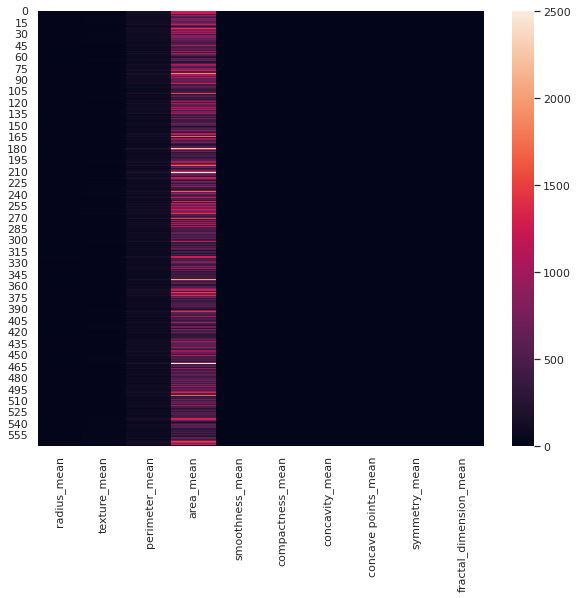

In [ ]:
plt.figure(figsize = (10,8))
#sns.pairplot(can, hue = 'diagnosis', vars = can_mean)            # pairplot
sns.heatmap(data = can_mean, cmap = 'rocket')
#can_mean.hist(edgecolor = 'black', linewidth = 1.2, figsize = (20,20))     # histogram grid
plt.show()

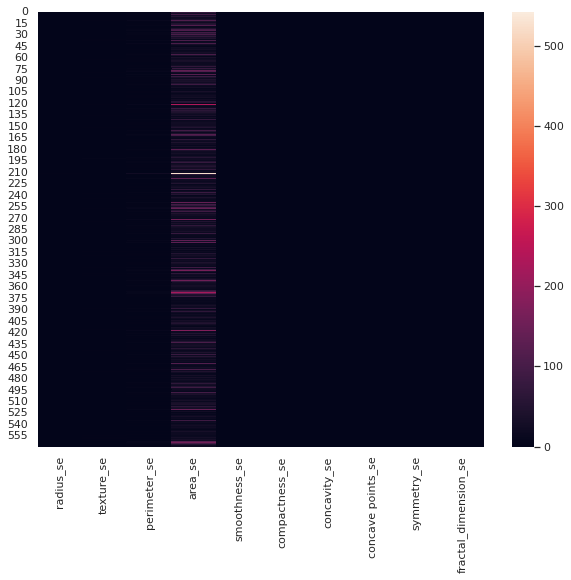

In [ ]:
plt.figure(figsize = (10,8))
#can_se.hist(edgecolor = 'black', linewidth = 1.2, figsize = (20,20))
sns.heatmap(data = can_se, cmap = 'rocket')
plt.show()

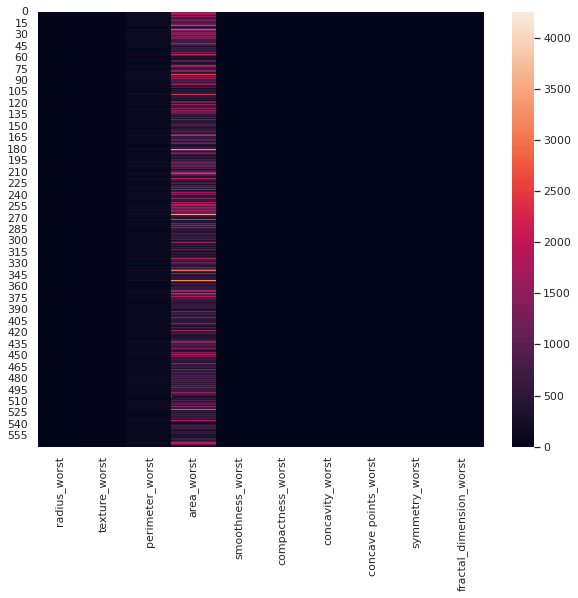

In [ ]:
plt.figure(figsize = (10,8))
#can_worst.hist(edgecolor = 'black', linewidth = 1.2, figsize = (20,20))
sns.heatmap(data = can_worst, cmap = 'rocket')
plt.show()

In [ ]:
# In above heatmap plotings for;
#                      'mean' -  it is easy to verify that 'area_mean' has largest values affected
#                      'se' - it is easy to verify that 'area_se' has more values affected
#                      'worst' - it is easy to verify that 'area_worst' has largest values affected

In [ ]:
can_mean.describe()             # uncommenting to 
#can_se.describe()              # check summary
#can_worst.describe()           # of any of this

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [ ]:
can['area_mean'].value_counts().unique()

array([3, 2, 1])

In [ ]:
can['area_se'].value_counts().unique()

array([3, 2, 1])

In [ ]:
can['area_worst'].value_counts().unique()

array([2, 1])

In [ ]:
can.isnull().sum()        # verifying no null values in dataset

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5.-----------------**Split Train & Test**------------------

In [ ]:
# importing ML lib - for split, train & test

!pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


# creating a dataframe for training from dataset
can_all = can.drop(['id', 'diagnosis'], axis = 1)
can_all.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [ ]:
can_val = pd.DataFrame(data = can_all)      # dataframe from can_all > can_all
can_val.tail(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12
568,7.76,24.54,47.92,181.00,0.05,0.04,0.00,0.00,0.16,0.06,...,9.46,30.37,59.16,268.60,0.09,0.06,0.00,0.00,0.29,0.07


In [ ]:
x = can_val             # in can_vall, there are all column except diagnosis asign from can_all
y = can.diagnosis

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) 

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(398, 30) (171, 30)
(398,) (171,)


In [ ]:
clf = LazyClassifier(ignore_warnings=True)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

models                  # checking whether which classifier has best score 


100%|██████████| 29/29 [00:01<00:00, 17.30it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.99,0.98,0.98,0.99,0.05
LogisticRegression,0.97,0.97,0.97,0.97,0.03
PassiveAggressiveClassifier,0.96,0.96,0.96,0.96,0.02
CalibratedClassifierCV,0.97,0.96,0.96,0.97,0.04
LinearSVC,0.96,0.96,0.96,0.96,0.03
KNeighborsClassifier,0.96,0.96,0.96,0.96,0.02
Perceptron,0.96,0.95,0.95,0.96,0.02
QuadraticDiscriminantAnalysis,0.95,0.95,0.95,0.95,0.04
SGDClassifier,0.95,0.95,0.95,0.95,0.04


In [ ]:
# for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score

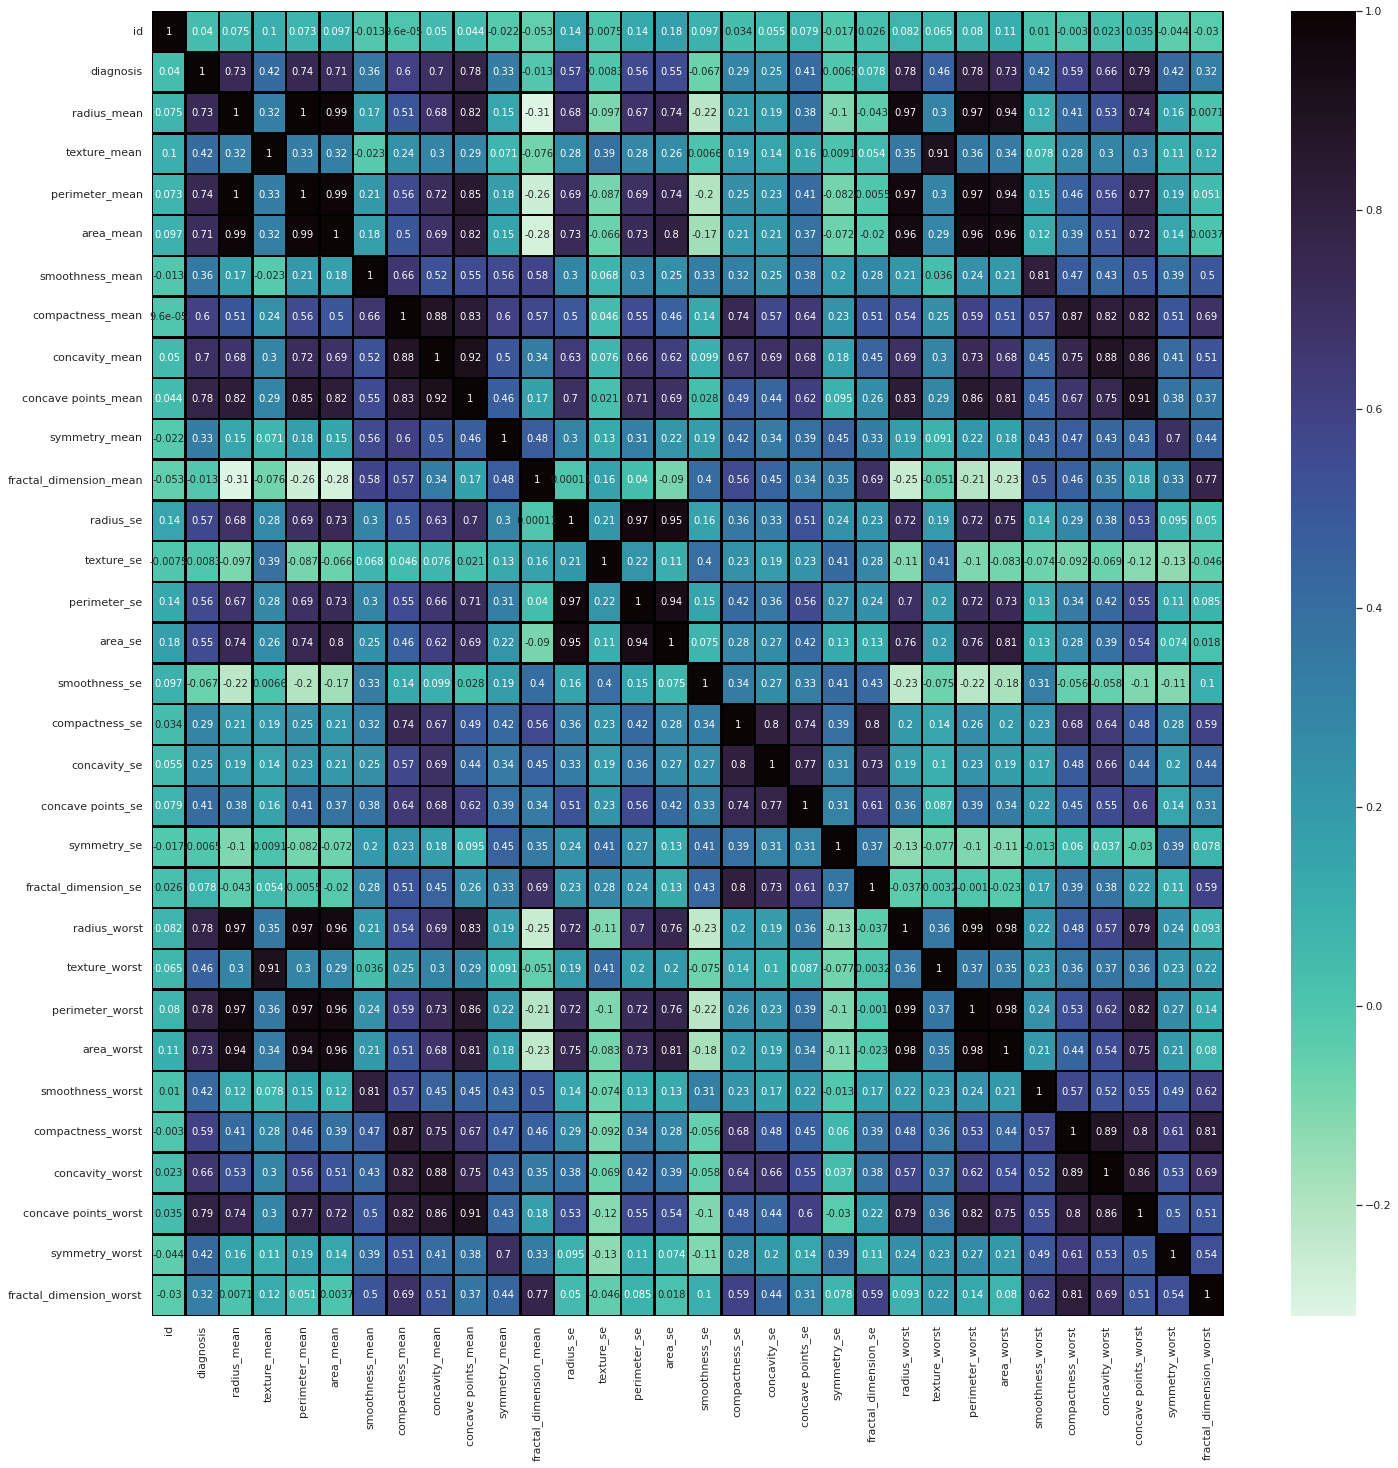

In [ ]:
plt.figure(figsize = (24,24))
sns.heatmap(can.corr(), annot = True, cmap = 'mako_r', linecolor = 'black', linewidths = 1.5)
plt.show()

In [ ]:
# From above heatmap, thus the relation between this variables are nicely correlated as the color goes to 1.0 (darker)
#---Observations-
# as seen before from heatmap (can_mean,can_se,can_worst);
#        area_mean & perimeter_mean       - high correlation
#        area_se & perimeter_se           - high correlation
#        area_worst & perimeter_worst     - high correlation

6.**-----------------Applying Algorithm------------------**

In [ ]:
# -------------------Performance Metrics-----------------

-----------**for Accuracy**

In [ ]:
#-----LogisticRegression

model1 = LogisticRegression(random_state = 3)
model1.fit(x_train, y_train)
prediction = model1.predict(x_test)
print('%.2f' % (metrics.accuracy_score(prediction, y_test)),' - is the Accuracy of Logistic Regression')

0.93  - is the Accuracy of Logistic Regression


In [ ]:
#-----DecisionTreeClassifier

model2 = DecisionTreeClassifier(splitter = 'best', random_state = 3)
model2.fit(x_train, y_train)
prediction = model2.predict(x_test)
print('%.2f' % (metrics.accuracy_score(prediction, y_test)),' - is the Accuracy of Decision Tree Classifier')

0.92  - is the Accuracy of Decision Tree Classifier


In [ ]:
#-----KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
prediction = model3.predict(x_test)
print('%.2f' % (metrics.accuracy_score(prediction, y_test)),' - is the Accuracy of KNeighbors Classifier')

0.91  - is the Accuracy of KNeighbors Classifier


In [ ]:
#-----SVM.SVC

model4 = svm.SVC(kernel = 'linear', random_state = 3)
model4.fit(x_train, y_train)
prediction = model4.predict(x_test)
print('%.2f' % (metrics.accuracy_score(prediction, y_test)),' - is the Accuracy of SVM Classifier')

0.97  - is the Accuracy of SVM Classifier


In [ ]:
# here applying confusion_matrix on svm model to check whether the best accuracy

# making variable for confusion_matrix
pred_y_cm = model4.predict(x_test)

[[107   1]
 [  4  59]]


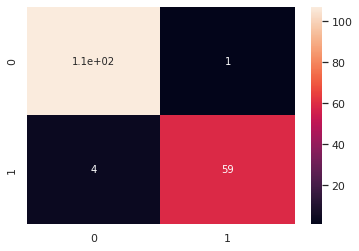

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_y_cm)
print(cm)

sns.heatmap(cm, annot = True, cmap = 'rocket')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y_cm))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
prediction_roc = model4_pr.predict(x_test)
print(prediction)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0.]


In [ ]:
print(y_test.values)

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0.]


-----------**for Precision**

In [ ]:
#-----LogisticRegression

model1 = LogisticRegression(random_state = 3)
model1.fit(x_train, y_train)
prediction_pr = model1.predict(x_test)
print('%.2f' % (metrics.precision_score(prediction_pr, y_test)),' - is the Precision_score of Logistic Regression')

0.87  - is the Accuracy of Logistic Regression


In [ ]:
#-----DecisionTreeClassifier

model2 = DecisionTreeClassifier(splitter = 'best', random_state = 3)
model2.fit(x_train, y_train)
prediction_pr = model2.predict(x_test)
print('%.2f' % (metrics.precision_score(prediction_pr, y_test)),' - is the Precision_score of Decision Tree Classifier')

0.87  - is the Accuracy of Decision Tree Classifier


In [ ]:
#-----KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
prediction_pr = model3.predict(x_test)
print('%.2f' % (metrics.precision_score(prediction_pr, y_test)),' - is the Precision_score of KNeighbors Classifier')

0.86  - is the Accuracy of KNeighbors Classifier


In [ ]:
#-----SVM.SVC

model4_pr = svm.SVC(kernel = 'linear', random_state = 3)
model4_pr.fit(x_train, y_train)
prediction_pr = model4_pr.predict(x_test)
print('%.2f' % (metrics.precision_score(prediction_pr, y_test)),' - is the Precision_score of SVM Classifier')

0.94  - is the Precision_score of SVM Classifier


-----------**for ROC_AUC_score**

In [ ]:
from sklearn.metrics import roc_auc_score
#-----LogisticRegression

model1 = LogisticRegression(random_state = 3)
model1.fit(x_train, y_train)
prediction_roc = model1.predict(x_test)
print('%.2f' % (metrics.roc_auc_score(prediction_roc, y_test)),' - is the ROC_AUC_score of Logistic Regression')

0.93  - is the ROC_AUC_score of Logistic Regression


In [ ]:
#-----DecisionTreeClassifier

model2 = DecisionTreeClassifier(splitter = 'best', random_state = 3)
model2.fit(x_train, y_train)
prediction_roc = model2.predict(x_test)
print('%.2f' % (metrics.roc_auc_score(prediction_roc, y_test)),' - is the ROC_AUC_score of Decision Tree Classifier')

0.92  - is the ROC_AUC_score of Decision Tree Classifier


In [ ]:
#-----KNeighborsClassifier

model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
prediction_roc = model3.predict(x_test)
print('%.2f' % (metrics.roc_auc_score(prediction_roc, y_test)),' - is the AROC_AUC_score of KNeighbors Classifier')

0.90  - is the AROC_AUC_score of KNeighbors Classifier


In [ ]:
#-----SVM.SVC

model4_pr = svm.SVC(kernel = 'linear', random_state = 3)
model4_pr.fit(x_train, y_train)
prediction_roc = model4_pr.predict(x_test)
print('%.2f' % (metrics.roc_auc_score(prediction_roc, y_test)),' - is the ROC_AUC_score of SVM Classifier')

0.97  - is the ROC_AUC_score of SVM Classifier


0.9736486486486486 



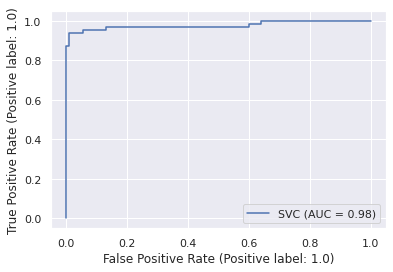

In [ ]:
# ROC plot

from sklearn.metrics import plot_roc_curve, auc
plot_roc_curve(model4, x_test, y_test)
#plt.plot(y_test, prediction_roc, color = 'green', linewidth = 1.2, linestyle = '--')
#plt.legend()
#plt.show()
print(metrics.roc_auc_score(prediction_roc, y_test),'\n')

In this plotting or ROC, SVC (AUC = 0.98) which is near positive 1

In [ ]:
#--------------------Ensemble models

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, x_test, y_test, cv=5)
scores.mean()

0.9297478991596639

In [ ]:
#s = svm.SVC()
#print(l.get_params().keys())     # for checking list of parameter of estimator

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [ ]:
#--------------------Ensemble models - hyperparamters of SVM Classifier

# defining parameter
from sklearn.model_selection import GridSearchCV

param_gs = {'C': [1, 10, 50, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['linear']}
gs = GridSearchCV(estimator = svm.SVC(), param_grid = param_gs, refit = True, verbose = 3)
gs.fit(x_train, y_train)

print(gs.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.963 total time=   0.7s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.925 total time=   0.3s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.975 total time=   0.4s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.962 total time=   0.3s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.949 total time=   0.5s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.963 total time=   0.3s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.3s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.4s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.962 total time=   0.3s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.5s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.963 total time=   0.3s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear

In [ ]:
print(gs.best_estimator_)

SVC(C=1, gamma=1, kernel='linear')


In [ ]:
gs_pred = gs.predict(x_test)
print(classification_report(y_test, gs_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Almost 97 % Prediction Result